In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import os 

In [2]:
# Importing dataset
file_path = 'TWO_CENTURIES_OF_UM_RACES.csv'
um_df = pd.read_csv(file_path, low_memory=False)
# Removing missing values from required columns
cleaned_df = um_df.dropna(subset=['Athlete country','Year of event'])


In [3]:
# Grouping data by Athlete Country and Year and aggregate the data
grouped_df = cleaned_df.groupby(['Athlete country', 'Year of event']).size().reset_index(name='Participants')

# Filter the DataFrame for years between 2000 and 2022, inclusive
filtered_df = grouped_df[(grouped_df['Year of event'] >= 2000) & (grouped_df['Year of event'] <= 2022)]

# Sum participants by country across the selected years
total_participants_by_country = filtered_df.groupby('Athlete country')['Participants'].sum().reset_index()



<Figure size 960x720 with 0 Axes>

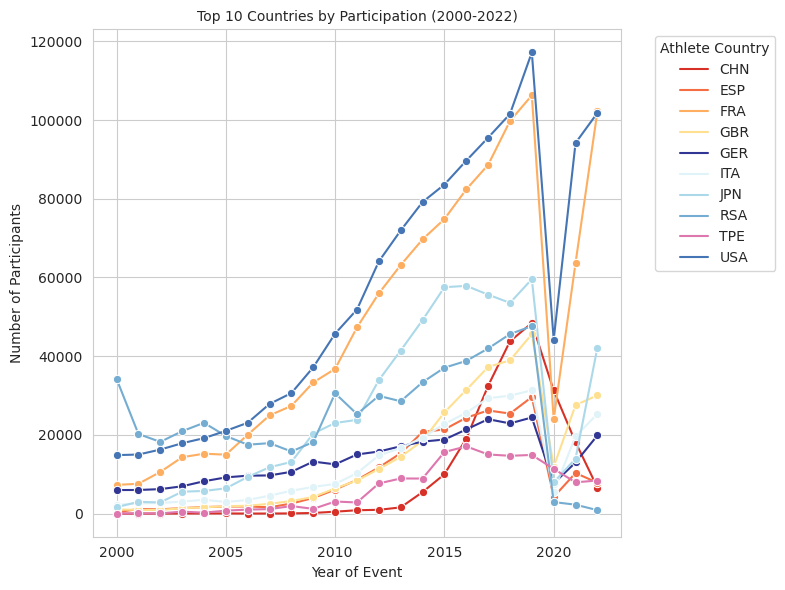

In [4]:
# How has participation changed over time in the top 10 countries with maximum participation?

# Sort by the number of participants and take the top 10 countries
top_10_countries = total_participants_by_country.sort_values(by='Participants', ascending=False).head(10)

# Extract the country names of the top 10 countries
top_10_country_names = top_10_countries['Athlete country'].tolist()

# Filter the original filtered data to include only the top 5 countries
top_countries_data = filtered_df[filtered_df['Athlete country'].isin(top_10_country_names)]

matplotlib.rcParams['figure.dpi']

# Adjust DPI for a new figure
plt.figure(dpi=150)  # Adjust as needed for your display

sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))

custom_palette = {
    'AUS': '#a50026',
    'CHN': '#d73027',
    'ESP': '#f46d43',
    'FRA': '#fdae61',
    'GBR': '#fee090',
    'ITA': '#e0f3f8',
    'JPN': '#abd9e9',
    'RSA': '#74add1',
    'USA': '#4575b4',
    'GER': '#313695',
    'TPE': '#de77ae' 
}

# Use lineplot to plot years on the x-axis and participants on the y-axis, with different colors for each country
sns.lineplot(data=top_countries_data, x='Year of event', y='Participants', hue='Athlete country', palette = custom_palette, marker = 'o')

plt.title('Top 10 Countries by Participation (2000-2022)', fontsize='10')
plt.xlabel('Year of Event', fontsize='10')
plt.ylabel('Number of Participants', fontsize='10')
plt.legend(title='Athlete Country', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='10')
plt.tight_layout()

# Save the figure with a specific DPI
plt.savefig('figure 5.png', dpi=300)

plt.show()

In [ ]:
# Diversity over time?

diversity_over_time = filtered_df.groupby('Year of event')['Athlete country'].size().reset_index(name='Number of Countries Participating')

# Plotting
plt.figure(figsize=(14, 8))
sns.lineplot(data=diversity_over_time, x='Year of event', y='Number of Countries Participating', marker='o')
plt.title('Diversity of Participation Over Time')
plt.xlabel('Year of Event')
plt.ylabel('Number of Countries Participating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




In [ ]:
# How has participation changed in the top country - USA over time ?

usa_data = filtered_df[filtered_df['Athlete country']=='USA']

sns.set_style("whitegrid")
plt.figure(figsize=(14,8))

sns.lineplot(data=usa_data, x = 'Year of event', y = 'Participants', marker = 'o')
plt.title('Participation in USA over time')
plt.xlabel('Year of Event')
plt.ylabel('Number of Countries Participating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




In [ ]:
# 